## Problem 4 - Deconvolution of the Haemodynamic Response

Neuronal activity causes local changes in deoxyhemoglobin concentration in the blood, which can be measured using magnetic resonance imaging (MRI).he haemodynamic response is both delayed and slower than the underlying neural responses. We can model the delay and spread of the measurements relative to the neural signals using a linear shift-invariant system: $$r(n)= ∑x(n-k)h(k)$$ Where x(n) is an input signal delivered over time (for example, a sequence of light intensities), h(k) is the haemodynamic response to a single light flash at time k = 0 (i.e., the impulse response of the MRI measurement), and r(n) is the MRI response to the full input signal.

In [12]:
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt
from scipy.io import loadmat
#Load given data 
load_data = loadmat('hrfDeconv.mat')
mri_out = load_data['r'][:,0]
data_in = load_data['x'][:,0]

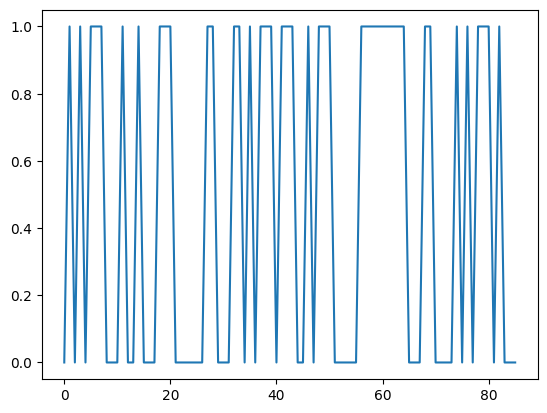

In [ ]:
plt.plot(data_in)

In [34]:
# a)  function createConvMat, that takes as arguments an input vector x and M (the dimensionality of h) and generates a matrix X such that the response r = Xh
def createConvMat(input_vect,filter_dim):
    convMat = np.zeros((len(input_vect)+filter_dim-1,filter_dim))
    for i in range(filter_dim):
        convMat[i:i+len(input_vect),i] = input_vect
    return convMat

# Convolution Matrix
input_convMat = createConvMat(data_in,15)

# Test that te convolution matrix provides the same results as the python function
results = [] 
for i in range(3): # Test for three different random h vectors
    h=np.random.random((15,1))
    if np.allclose((input_convMat@h)[:,0],np.convolve(data_in,h[:,0])):
        results.append(True)
    else: 
        results.append(False)

if np.all(results):
    print('The created function passed all random tests, matrix multiplication is equivalent to applying the python convolve function ')
print(results)
#Visualize matrix X as an image
plt.imshow(input_convMat,cmap= 'Greys')


The created function passed all random tests, matrix multiplication is equivalent to applying the python function 
[True, True, True]


In [33]:
results = [False,True]
np.all(results)

False

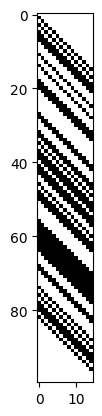